In [65]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [66]:
df.Gender = df['Gender'].replace(['Male', 'Female'], [0,1])
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [67]:
df.tail()

,Gender,Height,Weight
8550,1,60.483946,110.565497
8551,1,63.423372,129.921671
8552,1,65.584057,155.942671
8553,1,67.429971,151.678405
8554,1,60.921791,131.253738


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [69]:
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.415546,66.809925,165.632735
std,0.492845,3.851454,32.043922
min,0.000000,54.616858,65.780000
25%,0.000000,63.957684,139.876803
50%,0.000000,66.985923,168.521567
75%,1.000000,69.604427,190.666305
max,1.000000,80.450000,269.989698


# Separate X (Gender, Height) and Y (y=Weight).

In [70]:
x = df.drop("Weight", axis=1)

In [71]:
x

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796
...,...,...
8550,1,60.483946
8551,1,63.423372
8552,1,65.584057
8553,1,67.429971


In [72]:
y = df["Weight"]

In [73]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

# Train = 70%, Test = 30%

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
x_train.shape, y_train.shape

((5988, 2), (5988,))

In [77]:
x_test.shape, y_test.shape

((2567, 2), (2567,))

# Apply Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
y_pred_training = lr.predict(x_train)
y_pred_training

array([178.35427565, 202.22486558, 129.22191775, ..., 139.34406368,
       187.17224616, 158.78183812])

In [82]:
y_pred_testing = lr.predict(x_test)
y_pred_testing

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

# Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mse_training = mean_squared_error(y_train, y_pred_training)
mse_training

105.23806184862872

In [85]:
mse_testing = mean_squared_error(y_test, y_pred_testing)
mse_testing

96.83734437830613

In [86]:
mse_comparison = pd.DataFrame([mse_training, mse_testing], columns = ["MSE"], index = ["MSE Training", "MSE Testing"])
mse_comparison

,MSE
MSE Training,105.238062
MSE Testing,96.837344


# Apply KNN Regressor:

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
knn = KNeighborsRegressor()

In [89]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [90]:
y_knn_pred_training = knn.predict(x_train)
y_knn_pred_training

array([176.58174146, 205.54968066, 129.31875904, ..., 142.55470934,
       192.1316955 , 162.1670885 ])

In [91]:
y_knn_pred_testing = knn.predict(x_test)
y_knn_pred_testing

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

# Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [92]:
knn_mse_training = mean_squared_error(y_train, y_knn_pred_training)
knn_mse_training

84.89719950967454

In [93]:
knn_mse_testing = mean_squared_error(y_test, y_knn_pred_testing)
knn_mse_testing

121.33528273624482

In [94]:
knn_mse_comparison = pd.DataFrame([knn_mse_training, knn_mse_testing], columns=['KNN MSE'], index = ["MSE Training", "MSE Testing"])
knn_mse_comparison

,KNN MSE
MSE Training,84.897200
MSE Testing,121.335283


# Compare KNN & Linear Regression with the KNN Model and Linear regression as well.

In [95]:
knn_lr_mse_comparison = pd.merge(mse_comparison, knn_mse_comparison, left_index=True, right_index=True)
knn_lr_mse_comparison

,MSE,KNN MSE
MSE Training,105.238062,84.897200
MSE Testing,96.837344,121.335283


# Linear Regression

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

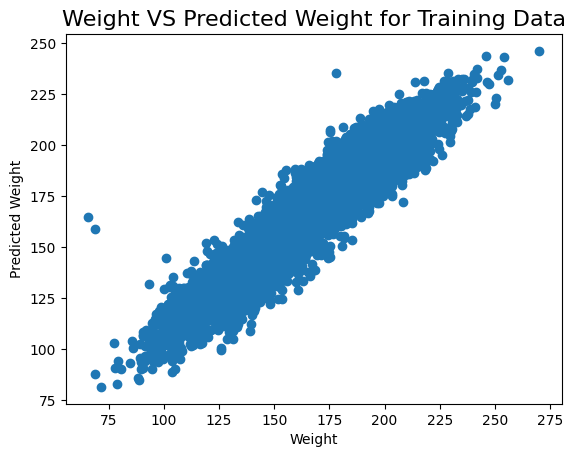

In [98]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Weight")
plt.ylabel("Predicted Weight")
plt.title("Weight VS Predicted Weight for Training Data", fontsize=16)

Text(0.5, 1.0, 'Weight VS Predicted Weight for Test Data')

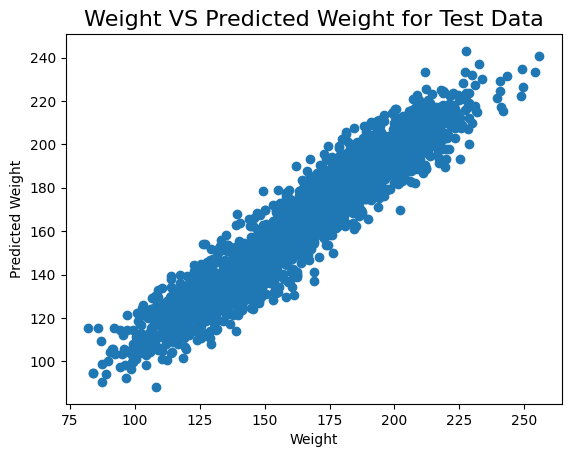

In [99]:
plt.scatter(y_test, y_pred_testing)
plt.xlabel("Weight")
plt.ylabel("Predicted Weight")
plt.title("Weight VS Predicted Weight for Test Data", fontsize=16)

# KNN

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

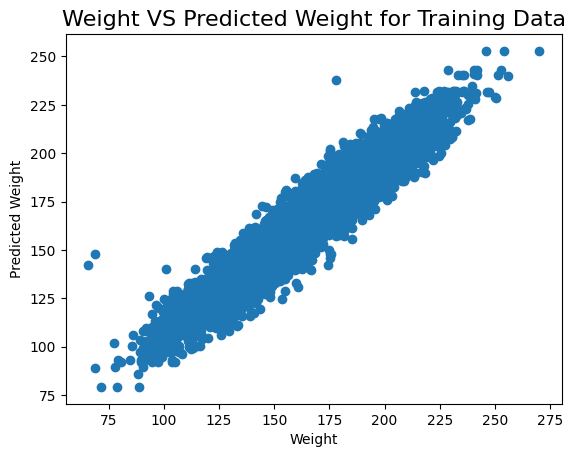

In [100]:
plt.scatter(y_train, y_knn_pred_training)
plt.xlabel("Weight")
plt.ylabel("Predicted Weight")
plt.title("Weight VS Predicted Weight for Training Data", fontsize=16)

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

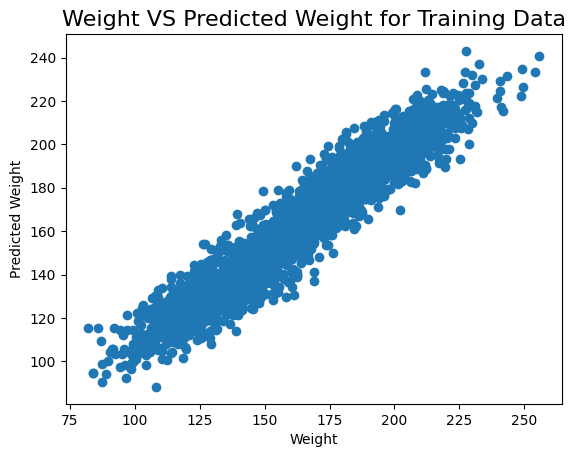

In [105]:
plt.scatter(y_test, y_pred_testing)
plt.xlabel("Weight")
plt.ylabel("Predicted Weight")
plt.title("Weight VS Predicted Weight for Training Data", fontsize=16)

# KNN for Classification

In [106]:
weight_height = pd.read_csv("weight-height.csv")
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [107]:
weight_height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [108]:
weight_height.describe(include="all")

,Gender,Height,Weight
count,8555,8555.000000,8555.000000
unique,2,NaN,NaN
top,Male,NaN,NaN
freq,5000,NaN,NaN
mean,NaN,66.809925,165.632735
std,NaN,3.851454,32.043922
min,NaN,54.616858,65.780000
25%,NaN,63.957684,139.876803
50%,NaN,66.985923,168.521567
75%,NaN,69.604427,190.666305


In [109]:
weight_height["Gender"] = weight_height["Gender"].replace(["Male", "Female"], [0,1])
weight_height.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [110]:
weight_height.tail()

,Gender,Height,Weight
8550,1,60.483946,110.565497
8551,1,63.423372,129.921671
8552,1,65.584057,155.942671
8553,1,67.429971,151.678405
8554,1,60.921791,131.253738


# Separate X and Y. (y=Gender)

In [112]:
X_knn = weight_height.drop("Gender", axis=1)
X_knn

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [113]:
y_knn = weight_height["Gender"]
y_knn

0       0
1       0
2       0
3       0
4       0
       ..
8550    1
8551    1
8552    1
8553    1
8554    1
Name: Gender, Length: 8555, dtype: int64

# Train = 70%, Test = 30%

In [114]:
Xk_train, Xk_test, yk_train, yk_test = train_test_split(X_knn, y_knn, test_size=.3, random_state=42)
Xk_train.shape

(5988, 2)

In [115]:
Xk_test.shape

(2567, 2)

In [116]:
yk_test.shape

(2567,)

# Apply KNN Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn_cls = KNeighborsClassifier()

In [120]:
knn_cls.fit(Xk_train, yk_train)

KNeighborsClassifier()

In [121]:
y_pred_cls = knn_cls.predict(Xk_test)
y_pred_cls

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

# Evaluate the Model by only Accuracy.

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
aScore = accuracy_score(yk_test, y_pred_cls)
aScore

0.9131281651733542